# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#import openweathermapy

In [2]:
# Output File (CSV)
output_datafile = "outputdata/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city by passing lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # append unique city to the list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 640 cities found from random geo-coordinates.


# Create a set of random lat and lng combinations

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
unit = "Imperial"

#api_key = "enter api key to execute"

base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : weather_api_key,
         "units" : unit}

# Create DataFrame with below parameters
city_weather_df = pd.DataFrame(columns=["City",
                                        "Cloudiness(%)",
                                        "Country",
                                        "Date",
                                        "Humidity(%)",
                                        "Lat",
                                        "Lng", 
                                        "Max Temp(F)",
                                        "Wind Speed(mph)"])

# get local current time
def current_date():
    localtime = time.asctime( time.localtime(time.time()) )
    return localtime.split(' ')[1]+"/"+localtime.split(' ')[2]+"/"+localtime.split(' ')[4]


print("Beginning Data Retrieval")
print("-----------------------------------")


# store each city weather information on DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    
    # Perform a weather check on each of the cities using a series of successive API calls    
    data = requests.get(base_url, params=param).json()
    try:
        city_weather_df.loc[i, "City"] = data["name"]
        city_weather_df.loc[i, "Cloudiness(%)"] = data["clouds"]["all"]
        city_weather_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_df.loc[i, "Date"] = current_date()
        city_weather_df.loc[i, "Humidity(%)"] = data["main"]["humidity"]
        city_weather_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_df.loc[i, "Max Temp(F)"] = data["main"]["temp_max"]
        city_weather_df.loc[i, "Wind Speed(mph)"] = data["wind"]["speed"]
        
        i += 1
        # Include a print log of each city as it's being processed with the city number and city name.
        print("Processing Record {:3d} of set {} | {} ".format(i, len(cities), data['name']))
              
    except KeyError:
        print("(Total {} cities out of {} not found...) ".format(not_found + 1, len(cities)))
        not_found += 1

print(f"""
-------------------------------------------
Data Retrieval Completed
-------------------------------------------""")

Beginning Data Retrieval
-----------------------------------
Processing Record   1 of set 640 | Tumut 
Processing Record   2 of set 640 | Martapura 
Processing Record   3 of set 640 | Avarua 
Processing Record   4 of set 640 | Khatanga 
Processing Record   5 of set 640 | Hobart 
Processing Record   6 of set 640 | Wawa 
Processing Record   7 of set 640 | Castiglione del Lago 
Processing Record   8 of set 640 | Saint Paul Harbor 
Processing Record   9 of set 640 | Mataura 
Processing Record  10 of set 640 | Busselton 
Processing Record  11 of set 640 | Hualmay 
Processing Record  12 of set 640 | Port Blair 
Processing Record  13 of set 640 | Tasiilaq 
Processing Record  14 of set 640 | Albany 
Processing Record  15 of set 640 | Esperance 
Processing Record  16 of set 640 | Ixtapa 
Processing Record  17 of set 640 | Imbituva 
Processing Record  18 of set 640 | Cidreira 
Processing Record  19 of set 640 | Barrow 
Processing Record  20 of set 640 | Tuktoyaktuk 
Processing Record  21 of set 

Processing Record 166 of set 640 | Bengkulu 
Processing Record 167 of set 640 | Gien 
Processing Record 168 of set 640 | Banda Aceh 
Processing Record 169 of set 640 | Chifeng 
Processing Record 170 of set 640 | Najrān 
Processing Record 171 of set 640 | Khovd 
Processing Record 172 of set 640 | Oruzgan 
Processing Record 173 of set 640 | Torbay 
(Total 17 cities out of 640 not found...) 
(Total 18 cities out of 640 not found...) 
Processing Record 174 of set 640 | Flin Flon 
(Total 19 cities out of 640 not found...) 
Processing Record 175 of set 640 | Vila Frescainha 
Processing Record 176 of set 640 | Chui 
Processing Record 177 of set 640 | Bakel 
Processing Record 178 of set 640 | Galle 
Processing Record 179 of set 640 | Parkes 
Processing Record 180 of set 640 | Prince Rupert 
Processing Record 181 of set 640 | Athabasca 
Processing Record 182 of set 640 | Gayéri 
Processing Record 183 of set 640 | Laas 
Processing Record 184 of set 640 | Hilo 
Processing Record 185 of set 640 | 

Processing Record 332 of set 640 | Pflugerville 
Processing Record 333 of set 640 | Tessalit 
Processing Record 334 of set 640 | Teguise 
Processing Record 335 of set 640 | Semey 
(Total 34 cities out of 640 not found...) 
Processing Record 336 of set 640 | Lorengau 
Processing Record 337 of set 640 | Te Anau 
Processing Record 338 of set 640 | Naberera 
Processing Record 339 of set 640 | Libertador General San Martín 
Processing Record 340 of set 640 | Beringovskiy 
Processing Record 341 of set 640 | Burē 
(Total 35 cities out of 640 not found...) 
(Total 36 cities out of 640 not found...) 
Processing Record 342 of set 640 | San Patricio 
Processing Record 343 of set 640 | Portland 
Processing Record 344 of set 640 | Buala 
Processing Record 345 of set 640 | Calama 
Processing Record 346 of set 640 | Esperanza 
Processing Record 347 of set 640 | Kuah 
Processing Record 348 of set 640 | Leh 
Processing Record 349 of set 640 | Mahébourg 
Processing Record 350 of set 640 | Lompoc 
Proces

Processing Record 502 of set 640 | ‘Ewa Beach 
(Total 46 cities out of 640 not found...) 
Processing Record 503 of set 640 | Koungheul 
Processing Record 504 of set 640 | Kiryat Gat 
(Total 47 cities out of 640 not found...) 
Processing Record 505 of set 640 | Phek 
Processing Record 506 of set 640 | Kailahun 
Processing Record 507 of set 640 | Paranhos 
Processing Record 508 of set 640 | Bereda 
(Total 48 cities out of 640 not found...) 
Processing Record 509 of set 640 | Tongren 
Processing Record 510 of set 640 | Bridlington 
Processing Record 511 of set 640 | Khorramshahr 
Processing Record 512 of set 640 | San Fernando 
Processing Record 513 of set 640 | Emirdağ 
Processing Record 514 of set 640 | NEDJO 
Processing Record 515 of set 640 | Sungai Penuh 
Processing Record 516 of set 640 | Richards Bay 
Processing Record 517 of set 640 | Villa Guerrero 
Processing Record 518 of set 640 | Ponta Delgada 
Processing Record 519 of set 640 | Ahipara 
Processing Record 520 of set 640 | Mit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

# Save CSV of all data retrieved
city_weather_df.to_csv(output_data_file)
city_weather_df.count()

In [6]:
#Display dataframe
city_weather_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp(F),Wind Speed(mph)
0,Tumut,100,AU,May//02:40:05,78,-35.3,148.22,45.21,9.01
1,Martapura,40,ID,May//02:40:26,79,-3.42,114.85,86,11.41
2,Avarua,100,CK,May//02:40:47,88,-21.21,-159.78,71.6,19.46
3,Khatanga,100,RU,May//02:41:02,96,71.97,102.5,21.31,6.8
4,Hobart,75,AU,May//02:41:02,81,-42.88,147.33,52,19.46


### Plotting the Data

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

Maximum Humidity 100.00 %
Minimum Humidity 7.00 %
Average Humidity 66.54 %


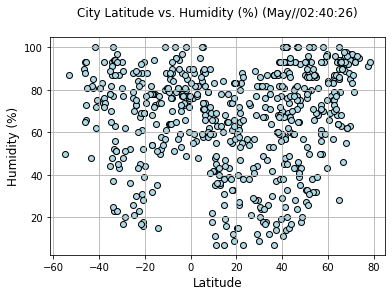

In [7]:
font = 12
lat = city_weather_df['Lat']
humidity = city_weather_df['Humidity(%)']
date = city_weather_df['Date'][1]

# Print analysis
print ("Maximum Humidity {:.2f} %".format(humidity.max()))
print ("Minimum Humidity {:.2f} %".format(humidity.min()))
print ("Average Humidity {:.2f} %".format(humidity.mean()))

plt.grid(True)
# create scatter plot for humidity by city latitude
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Humidity (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Humidity (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

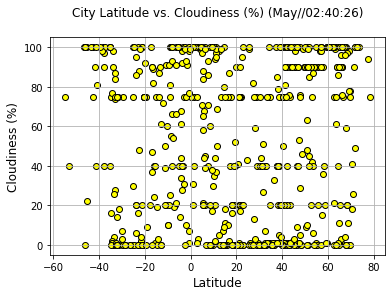

In [8]:
font = 12
lat = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness(%)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for cloudiness by city latitude
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Cloudiness (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Cloudiness (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

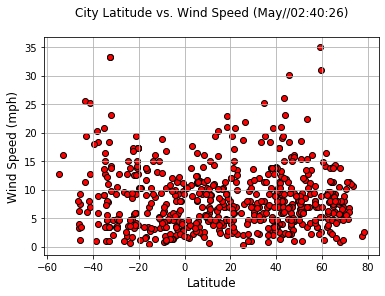

In [9]:
font = 12
lat = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed(mph)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for wind speed mph by city latitude
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Wind Speed (mph)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("outputdata/lat_wind_speed.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
humidity = city_weather_df['Humidity(%)']
date = city_weather_df['Date'][1]

# Print analysis
print ("Maximum Humidity {:.2f} %".format(humidity.max()))
print ("Minimum Humidity {:.2f} %".format(humidity.min()))
print ("Average Humidity {:.2f} %".format(humidity.mean()))

plt.grid(True)
# create scatter plot for humidity by city latitude
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Humidity (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Humidity (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_humidity.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed(mph)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for wind speed mph by city latitude
plt.scatter(lat, wind_speed, marker="o", facecolors="red", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Wind Speed (mph)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_wind_speed.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
max_temp = city_weather_df['Max Temp(F)']
date = city_weather_df['Date'][0]

# Print analysis
print ("Minimum Temprature is {:.2f}" .format(max_temp.min()))
print ("Average Temprature is {:.2f}" .format(max_temp.mean()))
print ("Maximun Temprature is {:.2f}" .format (max_temp.max()))  
print ("Their are {} cities temprature are greater than 100 degree (F) \n" .format (city_weather_df[city_weather_df['Max Temp(F)']> 100].count()['City']))
 


plt.grid(True)
# create scatter plot for city latitude with max temprature
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Max Temperature (F)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/max_temp.png")
plt.show()

font = 12
lat = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness(%)']
date = city_weather_df['Date'][1]

plt.grid(True)
# create scatter plot for cloudiness by city latitude
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black")
# set x axis label
plt.xlabel("Latitude", fontsize = font)
# set y axis label
plt.ylabel("Cloudiness (%)", fontsize = font)
# set chart title 
plt.title(f"City Latitude vs. Cloudiness (%) ({date})\n", fontsize = font)
#  save png images to output folder
plt.savefig("output_data/lat_cloudiness.png")
plt.show()